## Imports


In [1]:
import ee
import matplotlib.pyplot as plt
import pandas as pd

## GEE authentication

In [2]:
ee.Authenticate()
ee.Initialize()

Test if authentication was succesful

In [3]:
print(ee.String('Hello from the Earth Engine servers!').getInfo())

Hello from the Earth Engine servers!


## LEAF-toolbox imports

Modules imports cannot be done before GEE authentication have been run
succesfuly

In [4]:
from leaftoolbox import LEAF
from leaftoolbox import SL2PV0 
from leaftoolbox import SL2PV1

/home/ronny/.local/share/virtualenvs/reclaimed_sites_ab-QXta-KJo/lib/python3.10/site-packages/ee/deprecation.py:202: DeprecationWarning: 

Attention required for JRC/GSW1_0/GlobalSurfaceWater! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/JRC_GSW1_0_GlobalSurfaceWater

  warnings.warn(warning, category=DeprecationWarning)


# Process Collection of Input Images Returning GEE Collection of Output Products

In [5]:
imageCollection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
                    .filterDate('2020-08-01', '2020-08-16') \
                    .filter(ee.Filter.eq('MGRS_TILE','18TVQ'))
print(imageCollection.size().getInfo())

products = LEAF.makeProductImageCollection(imageCollection=imageCollection,algorithm=SL2PV0,variable='LAI',inputScaleSize=40) 
print(products.first().bandNames().getInfo())

6


/home/ronny/.local/share/virtualenvs/reclaimed_sites_ab-QXta-KJo/lib/python3.10/site-packages/ee/deprecation.py:202: DeprecationWarning: 

Attention required for COPERNICUS/Landcover/100m/Proba-V/Global! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_Landcover_100m_Proba-V_Global

  warnings.warn(warning, category=DeprecationWarning)


reprojecting
['date', 'QC', 'longitude', 'latitude', 'estimateLAI', 'partition', 'networkID', 'errorLAI']


# Process Sites with output as a Pandas Data Frame

In [6]:
siteList = ["projects/ee-modis250/assets/HuntClub",
            "projects/ee-modis250/assets/Nanaimo",
			"projects/ee-modis250/assets/Karachi"]

# Sample Surface Reflectance from various sensors over sites

In [7]:
#Landsat 8
sitesDictionaryL08SR = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC08/C02/T1_L2',\
                                                algorithm=SL2PV0, 
                                                variableName="Surface_Reflectance",\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2021-04-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99) 
# Landsat 9
sitesDictionaryL09SR = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC09/C02/T1_L2',\
                                                algorithm=SL2PV0, 
                                                variableName="Surface_Reflectance",\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2021-04-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99)


STARTING LEAF IMAGE for  LANDSAT/LC08/C02/T1_L2 
 
Site:  projects/ee-modis250/assets/HuntClub  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.

DONE LEAF SITE

Site:  projects/ee-modis250/assets/Nanaimo  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.
No images found.

DONE LEAF SITE

Site:  projects/ee-modis250/assets/Karachi  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.

DONE LEAF SITE


STARTING LEAF IMAGE for  LANDSAT/LC09/C02/T1_L2 
 
Site:  projects/ee-modis250/assets/HuntClub  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.

DONE LEAF SITE

Site:  projects/ee-modis250/assets/Nanaimo  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.

DONE LEAF SITE

Site:  projects/ee-modis250/assets/Karachi  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.

DONE LEAF SITE



In [8]:
 #Landsat 8
sitesDictionaryL08V0 = LEAF.sampleSites(siteList, \
                                                 imageCollectionName='LANDSAT/LC08/C02/T1_L2',\
                                                 algorithm=SL2PV0, 
                                                 variableName="LAI",\
                                                 maxCloudcover=90,\
                                                 outputScaleSize=30,\
                                                 inputScaleSize=30,\
                                                 bufferSpatialSize = 0,\
                                                 bufferTemporalSize =["2021-04-01","2022-10-01"],  \
                                                 subsamplingFraction = 0.99) 
# Landsat 9
sitesDictionaryL09V0 = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC09/C02/T1_L2',\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2021-04-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99)
#HLS
sitesDictionaryHLSV0 = LEAF.sampleSites(siteList, \
                                                imageCollectionName="NASA/HLS/HLSL30/v002",\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2021-04-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99)         

# S2
sitesDictionaryS2V0 = LEAF.sampleSites(siteList, \
                                                imageCollectionName="COPERNICUS/S2_SR_HARMONIZED",\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                outputScaleSize=20,\
                                                inputScaleSize=20,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2021-04-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99)


STARTING LEAF IMAGE for  LANDSAT/LC08/C02/T1_L2 
 
Site:  projects/ee-modis250/assets/HuntClub  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.

DONE LEAF SITE

Site:  projects/ee-modis250/assets/Nanaimo  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.
No images found.

DONE LEAF SITE

Site:  projects/ee-modis250/assets/Karachi  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.

DONE LEAF SITE


STARTING LEAF IMAGE for  LANDSAT/LC09/C02/T1_L2 
 
Site:  projects/ee-modis250/assets/HuntClub  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.

DONE LEAF SITE

Site:  projects/ee-modis250/assets/Nanaimo  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.

DONE LEAF SITE

Site:  projects/ee-modis250/assets/Karachi  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.
No images found.

DONE LEAF SITE


STARTING LEAF IMAGE for  NASA/HLS/HLSL30/v002 
 
Site:  projects/ee-modis250/assets/HuntClub  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.
No images found.

DONE LEAF SITE

Site:  projects/ee-modis250/assets/Nanaimo  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.
No images found.

DONE LEAF SITE

Site:  projects/ee-modis250/assets/Karachi  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])


No images found.

DONE LEAF SITE


STARTING LEAF IMAGE for  COPERNICUS/S2_SR_HARMONIZED 
 
Site:  projects/ee-modis250/assets/HuntClub  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])



DONE LEAF SITE

Site:  projects/ee-modis250/assets/Nanaimo  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])



DONE LEAF SITE

Site:  projects/ee-modis250/assets/Karachi  with  1  features.
Processing feature: 0  from  2021-04-01 00:00:00  to  2022-10-01 00:00:00


/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:308: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  if (len(pd.date_range(startDate,endDate,freq='m')) > 0 ):
/home/ronny/Documents/repos/github/reclaimed_sites_ab/leaftoolbox/LEAF.py:309: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dateRange = pd.DataFrame(pd.date_range(startDate,endDate,freq='m'),columns=['startDate'])



DONE LEAF SITE



# Visualize Results

Including one of the object


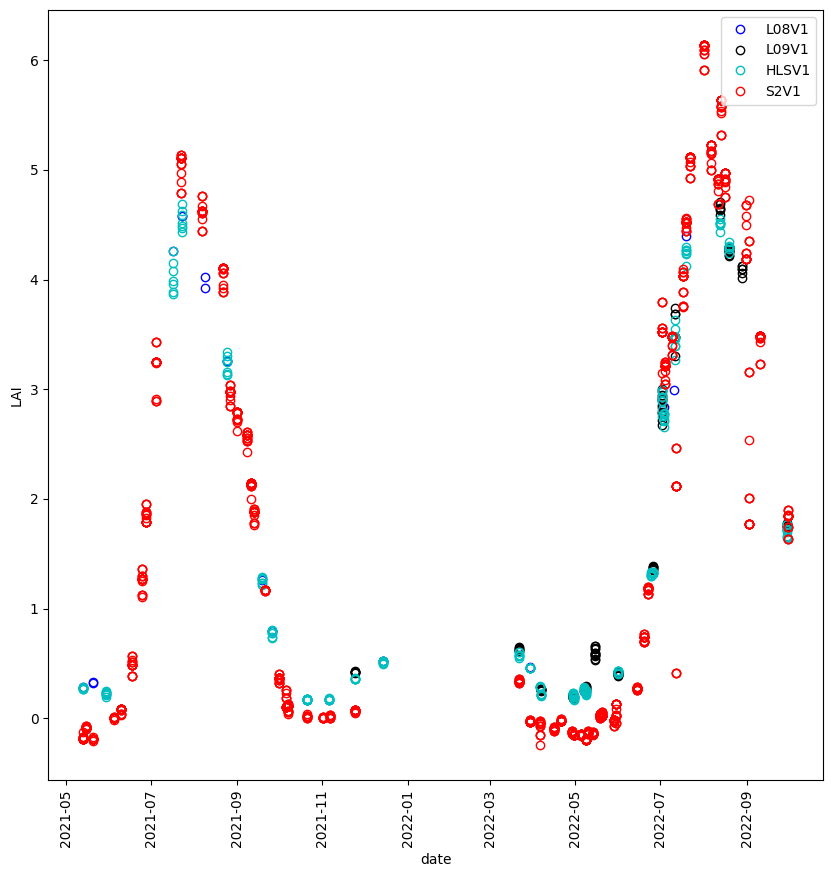

In [9]:
# Choose a site from the sitelist 
siteNum=0

# Select the first feature 
featureNum = 0

#Select one sampled pixel from each feature 
pixelNum = 3

#Extract time series of LAI with high quality only
site = sitesDictionaryL08V0[siteList[siteNum]]
# print(site[featureNum]['leaftoolbox.SL2PV0'])
df=site[featureNum]['leaftoolbox.SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelL08V0=df.loc[(df['longitude']==df.loc[pixelNum].longitude) & (df['latitude']==df.loc[pixelNum].latitude) & (df['QC']==0)]
site=sitesDictionaryL09V0[siteList[siteNum]]
df=site[featureNum]['leaftoolbox.SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelL09V0=df.loc[(df['longitude']==df.loc[pixelNum].longitude) & (df['latitude']==df.loc[pixelNum].latitude) & df['QC']==0]
site=sitesDictionaryHLSV0[siteList[siteNum]]
df=site[featureNum]['leaftoolbox.SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelHLSV0=df.loc[(df['longitude']==df.loc[pixelNum].longitude) & (df['latitude']==df.loc[pixelNum].latitude) & df['QC']==0]
site=sitesDictionaryS2V0[siteList[siteNum]]
df=site[featureNum]['leaftoolbox.SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelS2V0=df.loc[(df['longitude']==df.loc[pixelNum].longitude) & (df['latitude']==df.loc[pixelNum].latitude) & df['QC']==0]

fig,ax = plt.subplots(1,1,figsize=[10,10])
plt.plot(pixelL08V0['utc'],pixelL08V0['estimateLAI'],'ob',markerfacecolor='none', label='L08V1')
plt.plot(pixelL09V0['utc'],pixelL09V0['estimateLAI'],'ok',markerfacecolor='none', label='L09V1')
plt.plot(pixelHLSV0['utc'],pixelHLSV0['estimateLAI'],'oc',markerfacecolor='none', label='HLSV1')
plt.plot(pixelS2V0['utc'],pixelS2V0['estimateLAI'],'or',markerfacecolor='none',label='S2V1')

ax.legend()
ax.set_xlabel('date')
ax.set_ylabel('LAI')
plt.xticks(rotation=90);